<a href="https://colab.research.google.com/github/GouthamKumar-R/Colab/blob/main/EDA_attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis**




## Goutham

### **Overview** 

Attrition, refers to the phenomenon of the employees leaving the company. Employee attrition is always the focus of Human Resource Management. This project aims to predict factors affecting employee attrition.

Dataset :https://raw.githubusercontent.com/GouthamKumar-R/ML/master/D20%20-%20IML/Assignments/EDA%20%2B%20DV/attrition.csv

Data Dictonary: https://github.com/GouthamKumar-R/ML/blob/master/D20%20-%20IML/Assignments/EDA%20%2B%20DV/Data%20dict%20%20-%20Attrition.xlsx

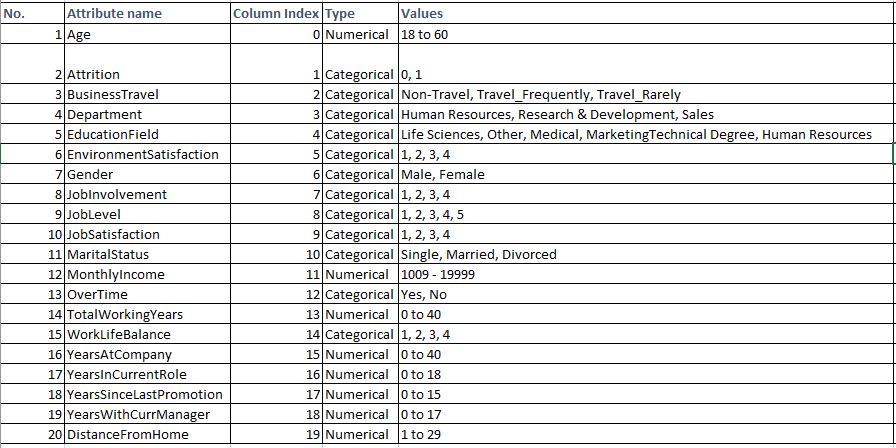

Hypothesis:
1. Low income vs Attrition ? 
2. Is distance from home a factor of Attrition?
3. Which Age group has the high attirition rate?
4. Does promotion play a major role in attrition?
5. Does Overtime has a significant impact on Attrition?
6. Those people who have rated their job satisfaction as low, do they leave?
7. Business Travel , Gender, martial status vs Attrition ?


### Libraries and Uploading the file

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')  

import warnings           
warnings.filterwarnings("ignore")    

Importing Files to Colab

In [ ]:
from google.colab import files 
  
  
uploaded = files.upload()

KeyboardInterrupt: ignored

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['attrition.csv']))

### Data Quality Check

In [ ]:
df.head()

Age  Attrition  ... YearsWithCurrManager DistanceFromHome
0   41          1  ...                    5                1
1   49          0  ...                    7                8
2   37          1  ...                    0                2
3   33          0  ...                    0                3
4   27          0  ...                    2                2

[5 rows x 20 columns]

In [ ]:
df.describe().T

count         mean  ...     75%      max
Age                      1470.0    36.923810  ...    43.0     60.0
Attrition                1470.0     0.161224  ...     0.0      1.0
EnvironmentSatisfaction  1470.0     2.721769  ...     4.0      4.0
JobInvolvement           1470.0     2.729932  ...     3.0      4.0
JobLevel                 1470.0     2.063946  ...     3.0      5.0
JobSatisfaction          1470.0     2.728571  ...     4.0      4.0
MonthlyIncome            1470.0  6502.931293  ...  8379.0  19999.0
TotalWorkingYears        1470.0    11.279592  ...    15.0     40.0
WorkLifeBalance          1470.0     2.761224  ...     3.0      4.0
YearsAtCompany           1470.0     7.008163  ...     9.0     40.0
YearsInCurrentRole       1470.0     4.229252  ...     7.0     18.0
YearsSinceLastPromotion  1470.0     2.187755  ...     3.0     15.0
YearsWithCurrManager     1470.0     4.123129  ...     7.0     17.0
DistanceFromHome         1470.0     9.192517  ...    14.0     29.0

[14 rows x 8 columns]

In [ ]:
df.shape

(1470, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   int64 
 2   BusinessTravel           1470 non-null   object
 3   Department               1470 non-null   object
 4   EducationField           1470 non-null   object
 5   EnvironmentSatisfaction  1470 non-null   int64 
 6   Gender                   1470 non-null   object
 7   JobInvolvement           1470 non-null   int64 
 8   JobLevel                 1470 non-null   int64 
 9   JobSatisfaction          1470 non-null   int64 
 10  MaritalStatus            1470 non-null   object
 11  MonthlyIncome            1470 non-null   int64 
 12  OverTime                 1470 non-null   object
 13  TotalWorkingYears        1470 non-null   int64 
 14  WorkLifeBalance          1470 non-null  

From the above result, we can infer that there are no NULL values

In [ ]:
allcolumns = df.columns.tolist()
allcolumns

['Age',
 'Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'OverTime',
 'TotalWorkingYears',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'DistanceFromHome']

Splitting **Categorical** and **Numerical** features

In [ ]:
df_cat = df[['Attrition', 'BusinessTravel', 'Department', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MaritalStatus', 'OverTime',
        'WorkLifeBalance']]
df_cat.sample(5)

Attrition     BusinessTravel  ... OverTime WorkLifeBalance
1301          0         Non-Travel  ...       No               2
770           0      Travel_Rarely  ...       No               3
853           0      Travel_Rarely  ...       No               3
29            0      Travel_Rarely  ...       No               2
880           0  Travel_Frequently  ...       No               3

[5 rows x 12 columns]

In [ ]:
# df_cat = df_cat.drop(['Attrition'], axis =1)

In [ ]:
df_num = df[['Attrition','Age','MonthlyIncome','TotalWorkingYears', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'DistanceFromHome' ]]
df_num.sample(5)

Attrition  Age  ...  YearsWithCurrManager  DistanceFromHome
733           0   26  ...                     3                 2
1438          1   23  ...                     0                 9
665           0   47  ...                     2                 2
1127          0   23  ...                     2                10
771           0   54  ...                     0                 2

[5 rows x 9 columns]

In [ ]:
# df_num = df_num.drop(['Attrition'], axis =1)

### **Univaritate Analysis:**

#### **Target variable**

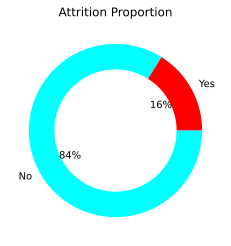

In [ ]:
#Attrition proportion - Using Doughnut chart
Y_count = len(df[df['Attrition'] == 1])
N_count = len(df[df['Attrition'] == 0])
# create data
names='Yes', 'No',
size=[Y_count,N_count]
 
# Create a circle for the center of the plot
circle = plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['red','cyan'],autopct='%1.0f%%')
p=plt.gcf()
p.gca().add_artist(circle)
ax = plt.axes()
ax.set_title("Attrition Proportion")
plt.show() 

 *Insight: It is an Imbalanced dataset.*

---



---



#### **Categorical Features:**

Analysis for Categorical variables: count, count distinct, Unique values

Graphs for Attrition:
Total_no. of categories:2


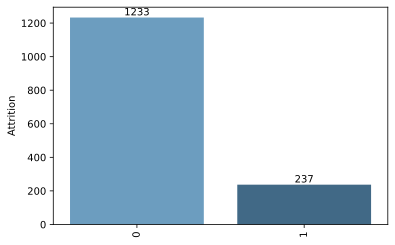

Graphs for BusinessTravel:
Total_no. of categories:3


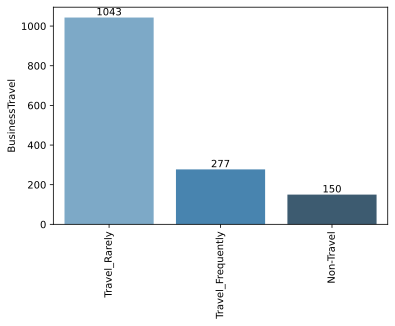

Graphs for Department:
Total_no. of categories:3


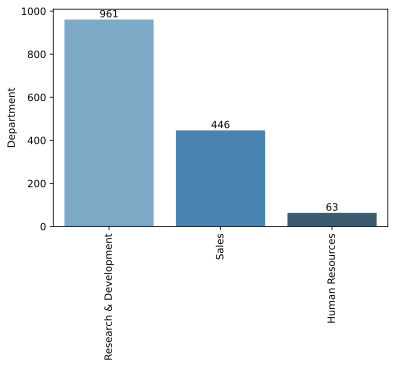

Graphs for EducationField:
Total_no. of categories:6


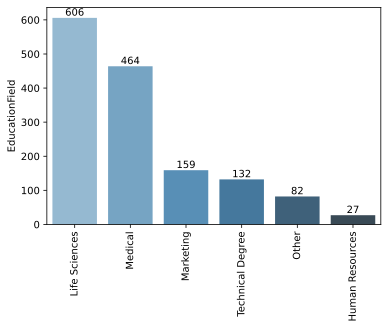

Graphs for EnvironmentSatisfaction:
Total_no. of categories:4


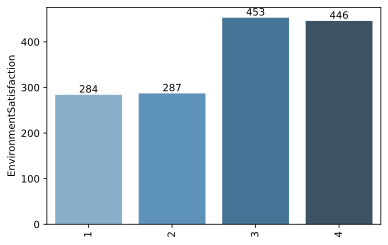

Graphs for Gender:
Total_no. of categories:2


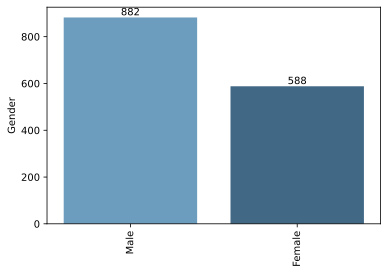

Graphs for JobInvolvement:
Total_no. of categories:4


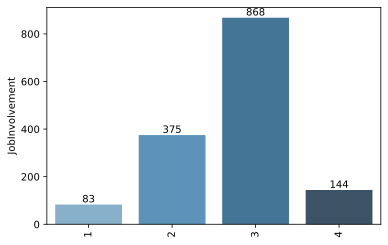

Graphs for JobLevel:
Total_no. of categories:5


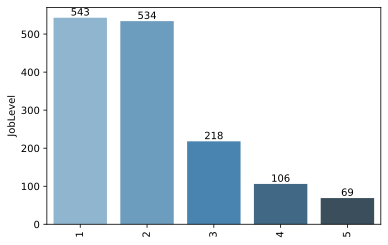

Graphs for JobSatisfaction:
Total_no. of categories:4


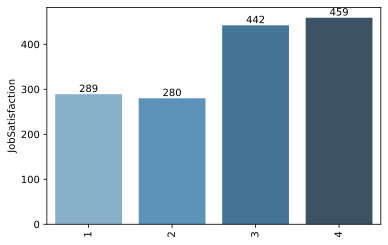

Graphs for MaritalStatus:
Total_no. of categories:3


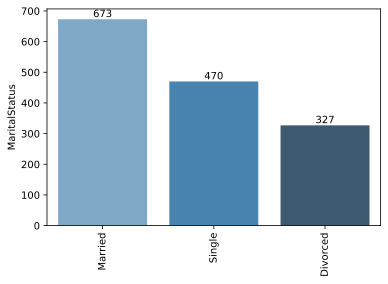

Graphs for OverTime:
Total_no. of categories:2


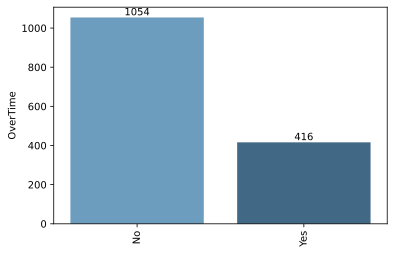

Graphs for WorkLifeBalance:
Total_no. of categories:4


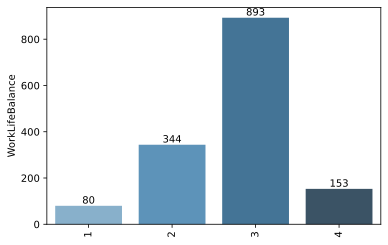

In [ ]:
#barplot: One axis is the category axis indicating the category, while the second axis is the value axis that shows the numeric value of that category, indicated by the length of the bar.

for i in df_cat:
    cat_num = df_cat[i].value_counts()
    print("Graphs for %s:\nTotal_no. of categories:%d" %(i, len(cat_num)))
    chart = sns.barplot(x= cat_num.index, y= cat_num, palette="Blues_d")
    chart.set_xticklabels(chart.get_xticklabels(),rotation = 90)
    for bar in chart.patches:
      chart.annotate(format(bar.get_height(), '.0f'), 
      (bar.get_x() + bar.get_width() / 2., bar.get_height()), 
       ha = 'center', va = 'center', 
       xytext = (0, 5), 
       textcoords = 'offset points')
    plt.show()

*Insights:* 


1.   More people are working in R&D   
2.   Most of the people are from Life sciences and Medicacl background, This means this company can be a Pharmacetuiacal company.
3.  Most of them are freshers(with joblevel 1 or 2)
4. Almost 30% work in OT
5. Most of the People have rated their Work-life balance as 3, why not 4?



---



---



#### **Numerical Features:**

Analysis for Numerical Features : count, min, max

Graphs for Attrition:
Minmum value of Attrition is :0
Maximum value of Attritionis:1


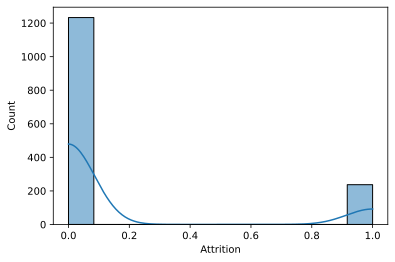

Graphs for Age:
Minmum value of Age is :18
Maximum value of Ageis:60


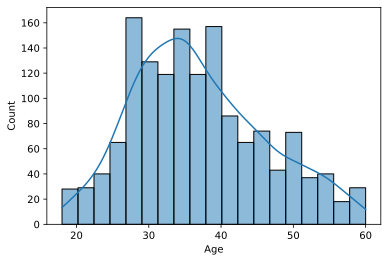

Graphs for MonthlyIncome:
Minmum value of MonthlyIncome is :1009
Maximum value of MonthlyIncomeis:19999


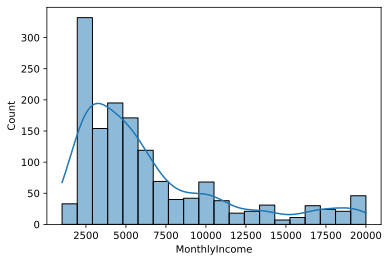

Graphs for TotalWorkingYears:
Minmum value of TotalWorkingYears is :0
Maximum value of TotalWorkingYearsis:40


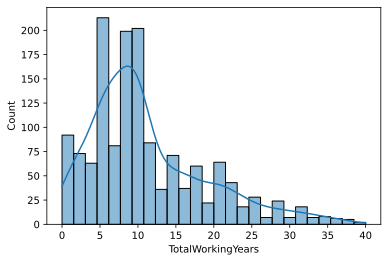

Graphs for YearsAtCompany:
Minmum value of YearsAtCompany is :0
Maximum value of YearsAtCompanyis:40


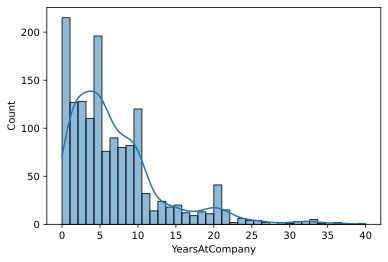

Graphs for YearsInCurrentRole:
Minmum value of YearsInCurrentRole is :0
Maximum value of YearsInCurrentRoleis:18


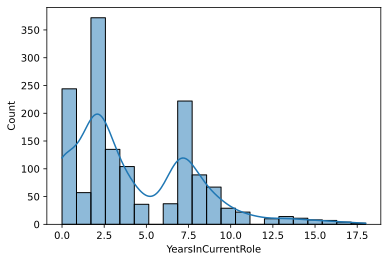

Graphs for YearsSinceLastPromotion:
Minmum value of YearsSinceLastPromotion is :0
Maximum value of YearsSinceLastPromotionis:15


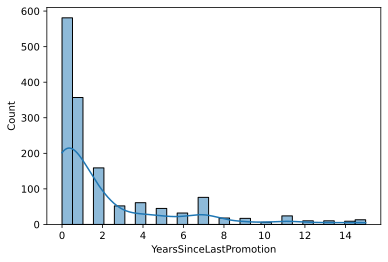

Graphs for YearsWithCurrManager:
Minmum value of YearsWithCurrManager is :0
Maximum value of YearsWithCurrManageris:17


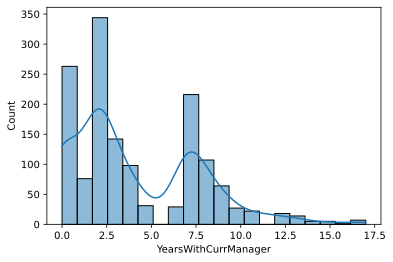

Graphs for DistanceFromHome:
Minmum value of DistanceFromHome is :1
Maximum value of DistanceFromHomeis:29


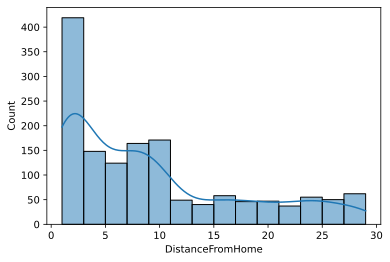

In [ ]:
#histogram with kde
for i in df_num:
  min = df_num[i].min()
  max = df_num[i].max()
  print("Graphs for %s:\nMinmum value of %s is :%d\nMaximum value of %sis:%d" %(i,i,min,i,max))
  sns.histplot(df_num, x=i, kde=True)
  plt.show()

*Insights:*

1. **Age** is slightly right skewed : People less than 40 are more in no.
2. **Monthly Income** is Right skewed : Low income people are high in no.(less than 10,000)
3. **Total Working years** is Right Skewed : People with less than 10 yrs of work exp. are high in no.
4. **Years at Company** It is clear that there are a lot of freshers with 0 years at the company.


---



---




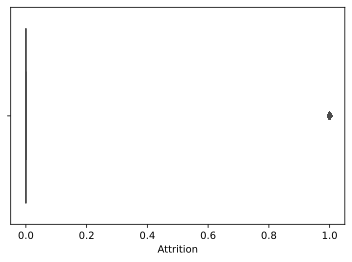

Median value of Attrition is :0
Q1 value of Attrition is :0
Q3 value of Attrition is :0
IQR value of Attrition is :0





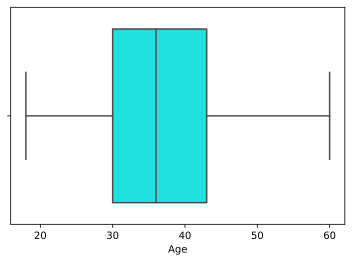

Median value of Age is :36
Q1 value of Age is :30
Q3 value of Age is :43
IQR value of Age is :13





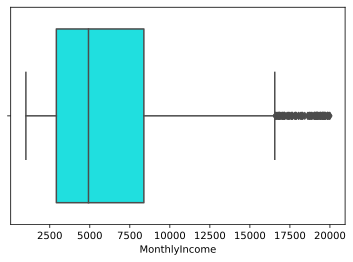

Median value of MonthlyIncome is :4919
Q1 value of MonthlyIncome is :2911
Q3 value of MonthlyIncome is :8379
IQR value of MonthlyIncome is :5468





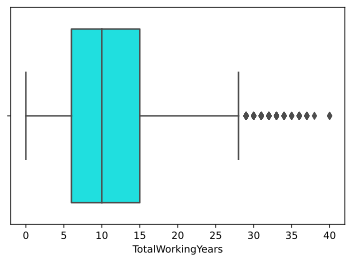

Median value of TotalWorkingYears is :10
Q1 value of TotalWorkingYears is :6
Q3 value of TotalWorkingYears is :15
IQR value of TotalWorkingYears is :9





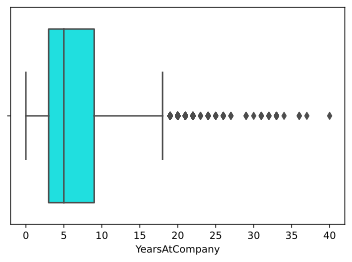

Median value of YearsAtCompany is :5
Q1 value of YearsAtCompany is :3
Q3 value of YearsAtCompany is :9
IQR value of YearsAtCompany is :6





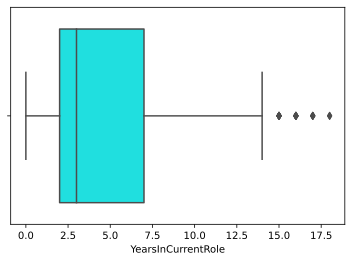

Median value of YearsInCurrentRole is :3
Q1 value of YearsInCurrentRole is :2
Q3 value of YearsInCurrentRole is :7
IQR value of YearsInCurrentRole is :5





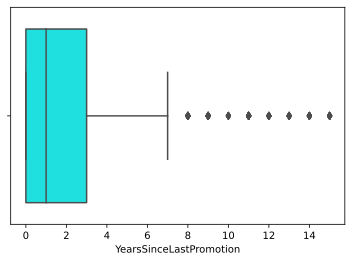

Median value of YearsSinceLastPromotion is :1
Q1 value of YearsSinceLastPromotion is :0
Q3 value of YearsSinceLastPromotion is :3
IQR value of YearsSinceLastPromotion is :3





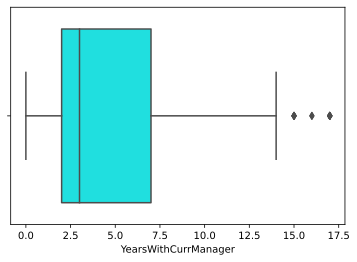

Median value of YearsWithCurrManager is :3
Q1 value of YearsWithCurrManager is :2
Q3 value of YearsWithCurrManager is :7
IQR value of YearsWithCurrManager is :5





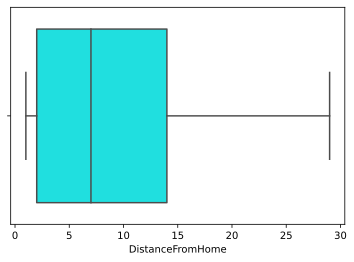

Median value of DistanceFromHome is :7
Q1 value of DistanceFromHome is :2
Q3 value of DistanceFromHome is :14
IQR value of DistanceFromHome is :12





In [ ]:
#boxplots for outliers analysis
for i in df_num:
    sns.boxplot(x = df_num[i], color='cyan')
    plt.show()
    med = df_num[i].median()
    Q1 = df_num[i].quantile(0.25)
    Q3 = df_num[i].quantile(0.75)
    IQR = df_num[i].quantile(0.75) - df_num[i].quantile(0.25)
    print("Median value of %s is :%d" %(i,med))
    print("Q1 value of %s is :%d\nQ3 value of %s is :%d\nIQR value of %s is :%d\n\n\n"%(i,Q1,i,Q3,i,IQR))


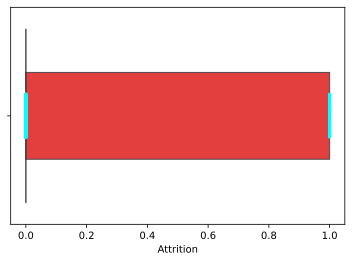

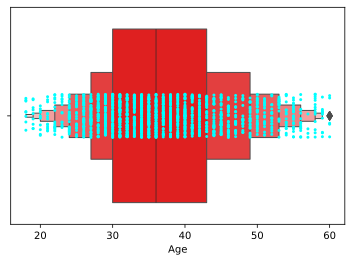

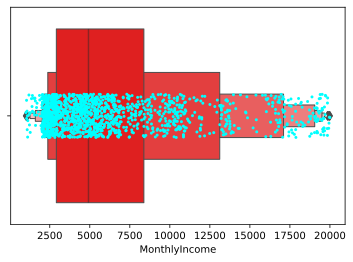

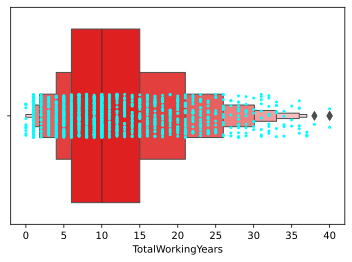

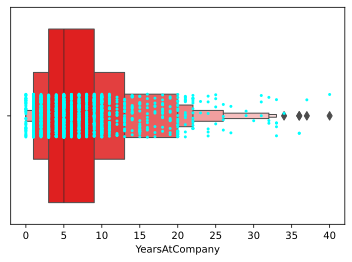

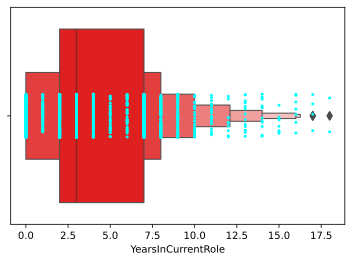

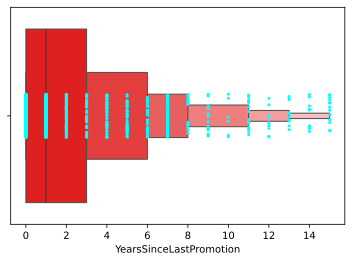

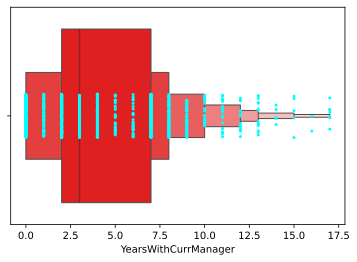

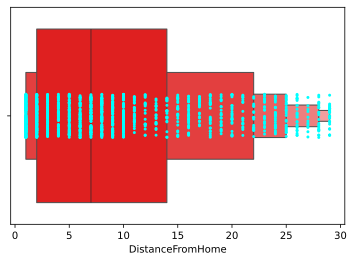

In [ ]:
#boxen + stripplot for distribution analysis
for i in df_num:
    sns.boxenplot(x = df_num[i], color="red")
    sns.stripplot(x = df_num[i], color = 'cyan', size = 3)
    plt.show()

*Insights:*<br/>
It is evident from the boxen + stripplot that, more datapoints are between 2.5K to 7.5K in monthly income-> Low income people are high in no.

---



---




### **Bivariate Analysis:**

#### Contigency table: 

**OT** vs Attrition:

In [91]:
((pd.crosstab(df_cat['Attrition'],df_cat['OverTime'],normalize=True,margins=True, margins_name="Total%")*100).round(1))


OverTime     No   Yes  Total%
Attrition                    
0          64.2  19.7    83.9
1           7.5   8.6    16.1
Total%     71.7  28.3   100.0

*Insight:*
**Interesting!!!** OT doesn't have a significat Impact on Attrition rate

---



---



**Job Satisfaction** vs Attrition

In [92]:
((pd.crosstab(df_cat['Attrition'],df_cat['JobSatisfaction'],normalize=True,margins=True, margins_name="Total%")*100).round(1))

JobSatisfaction     1     2     3     4  Total%
Attrition                                      
0                15.2  15.9  25.1  27.7    83.9
1                 4.5   3.1   5.0   3.5    16.1
Total%           19.7  19.0  30.1  31.2   100.0

### **Correlation for Numerical Features:**

In [ ]:
#correlation matrix - numerical data
correlation_matrix = df_num.corr()
correlation_matrix.to_csv("Correlation_mat-Attrition.csv")
correlation_matrix

Attrition  ...  DistanceFromHome
Attrition                 1.000000  ...          0.077924
Age                      -0.159205  ...         -0.001686
MonthlyIncome            -0.159840  ...         -0.017014
TotalWorkingYears        -0.171063  ...          0.004628
YearsAtCompany           -0.134392  ...          0.009508
YearsInCurrentRole       -0.160545  ...          0.018845
YearsSinceLastPromotion  -0.033019  ...          0.010029
YearsWithCurrManager     -0.156199  ...          0.014406
DistanceFromHome          0.077924  ...          1.000000

[9 rows x 9 columns]

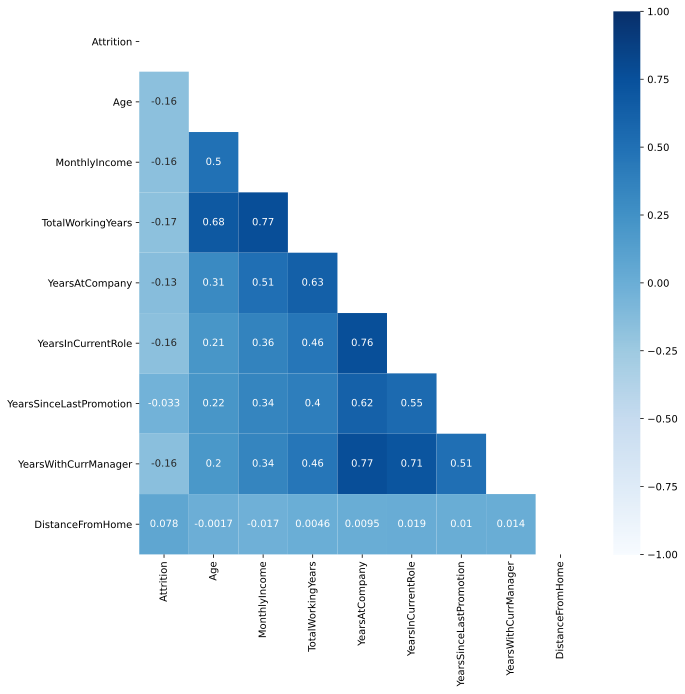

In [ ]:
plt.figure(figsize=(10,10))
matrix = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix,annot=True,mask = matrix,cmap="Blues", vmin=-1,vmax=1,center=0)

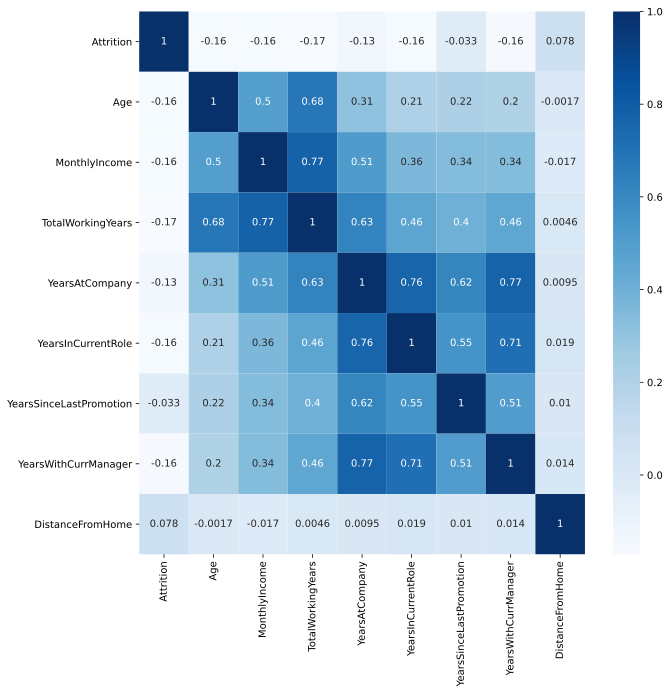

In [ ]:
plt.figure(figsize=(10,10))

sns.heatmap(correlation_matrix,annot=True,cmap="Blues")

**Result and Inferences:**

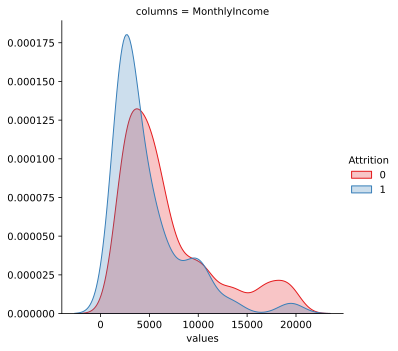

In [ ]:
#melt changes a df from wide format to long format
income = df[['MonthlyIncome','Attrition']]
Income_melt = income.melt(['Attrition'], var_name='columns',  value_name='values') 


i = sns.FacetGrid(Income_melt, col='columns', hue="Attrition", palette="Set1",size=5)
i = (i.map(sns.distplot, "values", hist=False, rug=False, kde_kws={"shade": True}).add_legend())

#Employees with Low-salary tend to attrite more

### **Categorical Associations:**

In [ ]:
#changing all catg to num(dummy)
df_cat1 = pd.get_dummies(df_cat)
df_cat1.head()

Attrition  EnvironmentSatisfaction  ...  OverTime_No  OverTime_Yes
0          1                        2  ...            0             1
1          0                        3  ...            1             0
2          1                        4  ...            0             1
3          0                        4  ...            0             1
4          0                        1  ...            1             0

[5 rows x 25 columns]

In [ ]:
#categorical association -csv
cat_association = df_cat1.corr()
cat_association.to_csv("Categorical_associations-Attrition.csv")
cat_association

Attrition  ...  OverTime_Yes
Attrition                           1.000000  ...      0.246118
EnvironmentSatisfaction            -0.103369  ...      0.070132
JobInvolvement                     -0.130016  ...     -0.003507
JobLevel                           -0.169105  ...      0.000544
JobSatisfaction                    -0.103481  ...      0.024539
WorkLifeBalance                    -0.063939  ...     -0.027092
BusinessTravel_Non-Travel          -0.074457  ...     -0.037163
BusinessTravel_Travel_Frequently    0.115143  ...      0.029392
BusinessTravel_Travel_Rarely       -0.049538  ...     -0.000539
Department_Human Resources          0.016832  ...     -0.006178
Department_Research & Development  -0.085293  ...     -0.003036
Department_Sales                    0.080855  ...      0.005864
EducationField_Human Resources      0.036466  ...      0.004040
EducationField_Life Sciences       -0.032703  ...     -0.013787
EducationField_Marketing            0.055781  ...      0.014607
EducationField_Medical             -0.046999  ...      0.002246
EducationField_Other               -0.017898  ...      0.024970
EducationField_Technical Degree     0.069355  ...     -0.017723
Gender_Female                      -0.029453  ...      0.041924
Gender_Male                         0.029453  ...     -0.041924
MaritalStatus_Divorced             -0.087716  ...      0.023462
MaritalStatus_Married              -0.090984  ...     -0.013502
MaritalStatus_Single                0.175419  ...     -0.006498
OverTime_No                        -0.246118  ...     -1.000000
OverTime_Yes                        0.246118  ...      1.000000

[25 rows x 25 columns]

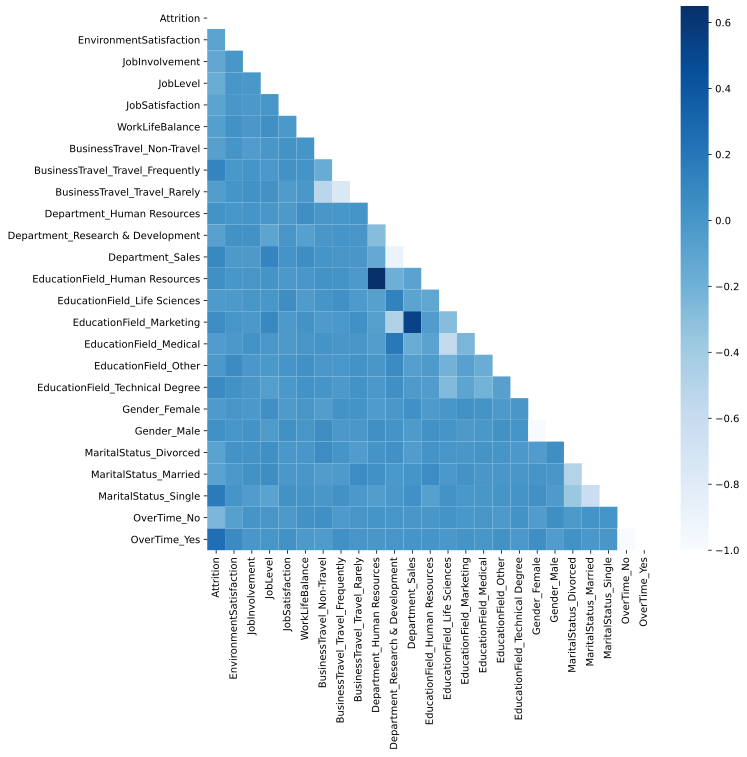

In [ ]:
plt.figure(figsize=(10,10))
matrix = np.triu(cat_association)
sns.heatmap(cat_association, cmap="Blues", mask= matrix)
plt.savefig("Categorical_associations-Attrition")

In [ ]:
#Side by Side boxplot

In [ ]:
#cross tabs


In [ ]:
#box plots -> !!

## **Section** 2 - Kaviya


Graphs for Attrition:
Total_no. of categories:2


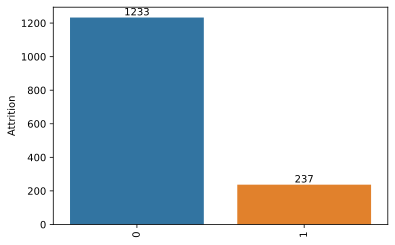

Graphs for BusinessTravel:
Total_no. of categories:3


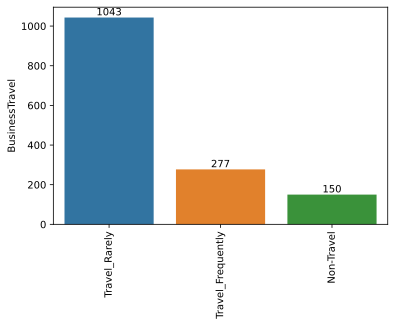

Graphs for Department:
Total_no. of categories:3


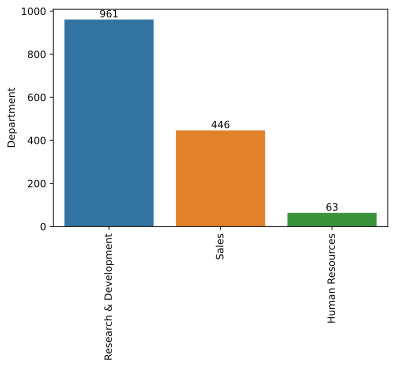

Graphs for EducationField:
Total_no. of categories:6


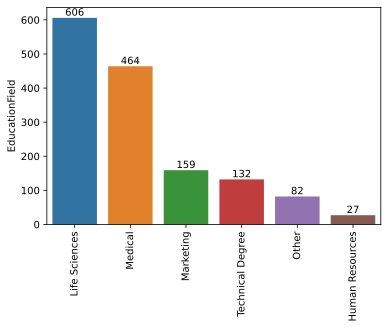

Graphs for EnvironmentSatisfaction:
Total_no. of categories:4


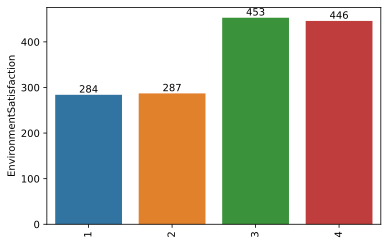

Graphs for Gender:
Total_no. of categories:2


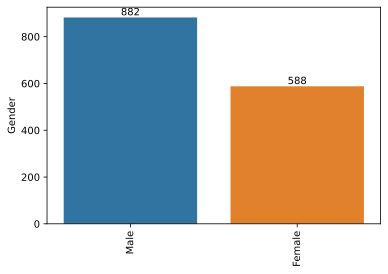

Graphs for JobInvolvement:
Total_no. of categories:4


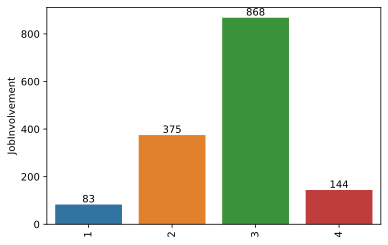

Graphs for JobLevel:
Total_no. of categories:5


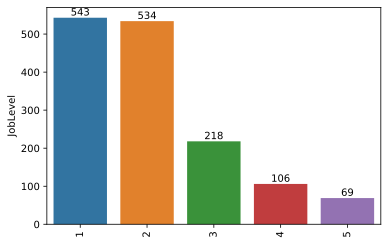

Graphs for JobSatisfaction:
Total_no. of categories:4


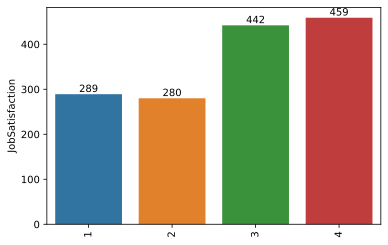

Graphs for MaritalStatus:
Total_no. of categories:3


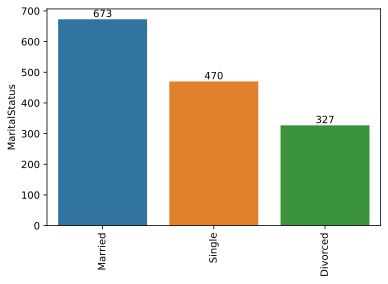

Graphs for OverTime:
Total_no. of categories:2


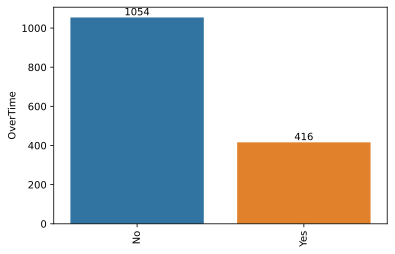

Graphs for WorkLifeBalance:
Total_no. of categories:4


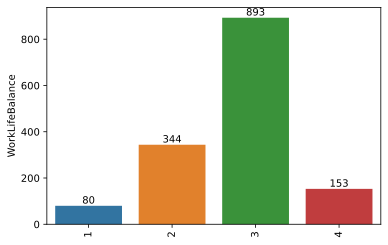

In [ ]:
#Annotations for bar chart added - Univariate cat
for i in df_cat:
    cat_num = df_cat[i].value_counts() #getting unique category in each cat variable 
    print("Graphs for %s:\nTotal_no. of categories:%d" %(i, len(cat_num)))
    chart = sns.barplot(x= cat_num.index, y= cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation = 90)
    for bar in chart.patches:
      chart.annotate(format(bar.get_height(), '.0f'), 
      (bar.get_x() + bar.get_width() / 2., bar.get_height()), 
       ha = 'center', va = 'center', 
       xytext = (0, 5), 
       textcoords = 'offset points')
    plt.show()

Attrition
Distribution of Attrition:


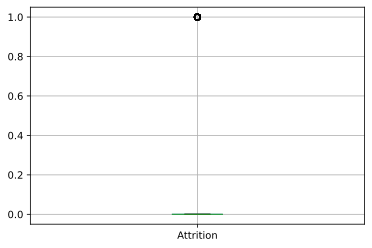

Age
Distribution of Age:


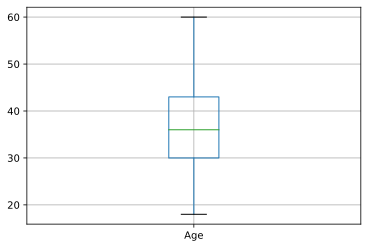

MonthlyIncome
Distribution of MonthlyIncome:


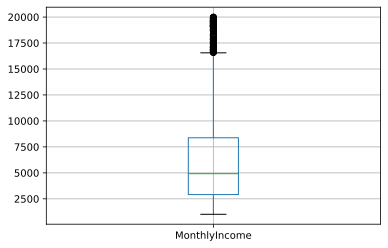

TotalWorkingYears
Distribution of TotalWorkingYears:


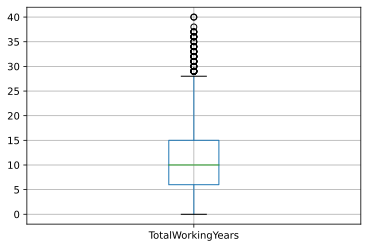

YearsAtCompany
Distribution of YearsAtCompany:


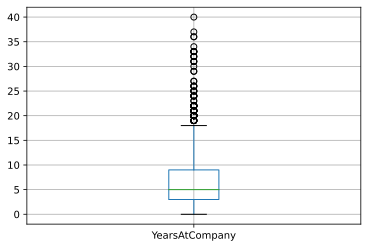

YearsInCurrentRole
Distribution of YearsInCurrentRole:


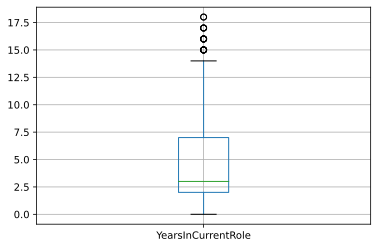

YearsSinceLastPromotion
Distribution of YearsSinceLastPromotion:


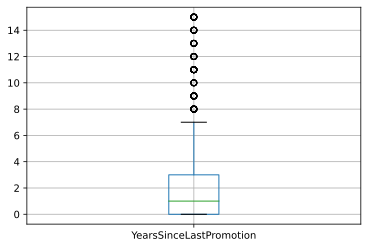

YearsWithCurrManager
Distribution of YearsWithCurrManager:


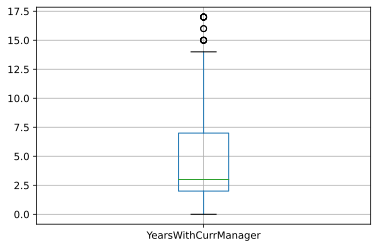

DistanceFromHome
Distribution of DistanceFromHome:


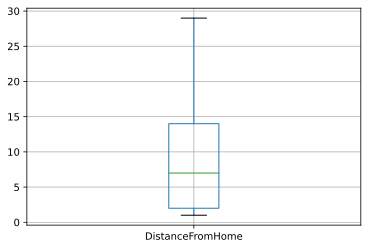

In [ ]:
#Box plot added  - Univariate num
for i in df_num:
  #print(i)
  print("Distribution of %s:" %(i))
  df_num.boxplot(i)
  plt.show()

 **2. Bivariate Analysis**

**A. Categorical Variables**

**Overtime**

28% of the employees are doing overtime,

Out of 16% attrited employees how many have worked overtime?

In [ ]:
((pd.crosstab(df_cat['Attrition'],df_cat['OverTime'],normalize=True,margins=True, margins_name="Total")*100).round(1))
    

OverTime     No   Yes  Total
Attrition                   
0          64.2  19.7   83.9
1           7.5   8.6   16.1
Total      71.7  28.3  100.0

**Job Level**

77% of the employees are with Level 1 & 2,

Out of 16% attrited employees how many are with 1 & 2 job level?

In [ ]:
((pd.crosstab(df_cat['Attrition'],df_cat['JobLevel'],normalize=True,margins=True, margins_name="Total")*100).round(1))
    

JobLevel      1     2     3    4    5  Total
Attrition                                   
0          27.2  32.8  12.7  6.9  4.4   83.9
1           9.7   3.5   2.2  0.3  0.3   16.1
Total      36.9  36.3  14.8  7.2  4.7  100.0

**Martial Status**

Has matrial status impacted Attrition?

In [ ]:
((pd.crosstab(df_cat['Attrition'],df_cat['MaritalStatus'],normalize=True,margins=True, margins_name="Total")*100).round(1))

MaritalStatus  Divorced  Married  Single  Total
Attrition                                      
0                  20.0     40.1    23.8   83.9
1                   2.2      5.7     8.2   16.1
Total              22.2     45.8    32.0  100.0

Employees who are single have contributed to 8% of attrition out of 16%.

**Gender**

Which gender have comparitively attrited more?

In [ ]:
((pd.crosstab(df_cat['Attrition'],df_cat['Gender'],normalize=True,margins=True, margins_name="Total")*100).round(1))
    

Gender     Female  Male  Total
Attrition                     
0            34.1  49.8   83.9
1             5.9  10.2   16.1
Total        40.0  60.0  100.0

Male employees have contributed to 10% of attrition out of 16%

**Enivornment Satisfaction** - TBC

39% of employees have rated low enivornment satisfaction,

Out of attrited employees (16%), how many rated low environment satisfaction?

In [ ]:
((pd.crosstab(df_cat['Attrition'],df_cat['EnvironmentSatisfaction'],normalize=True,margins=True, margins_name="Total")*100).round(1))
    

EnvironmentSatisfaction     1     2     3     4  Total
Attrition                                             
0                        14.4  16.6  26.6  26.3   83.9
1                         4.9   2.9   4.2   4.1   16.1
Total                    19.3  19.5  30.8  30.3  100.0

**Business Travel** - TBC

In [ ]:
((pd.crosstab(df_cat['Attrition'],df_cat['BusinessTravel'],normalize=True,margins=True, margins_name="Total")*100).round(1))
    

BusinessTravel  Non-Travel  Travel_Frequently  Travel_Rarely  Total
Attrition                                                          
0                      9.4               14.1           60.3   83.9
1                      0.8                4.7           10.6   16.1
Total                 10.2               18.8           71.0  100.0

In [ ]:
df_cat_corr=df[['EnvironmentSatisfaction','Gender','JobLevel','MaritalStatus','OverTime','BusinessTravel']]

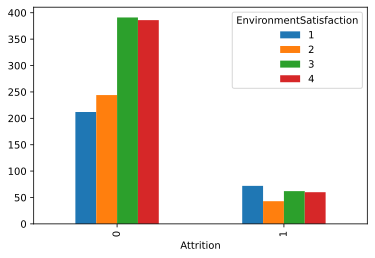

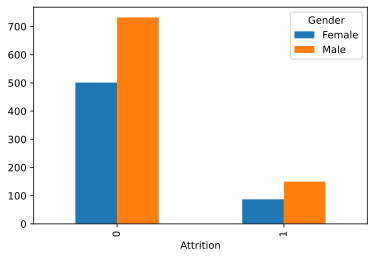

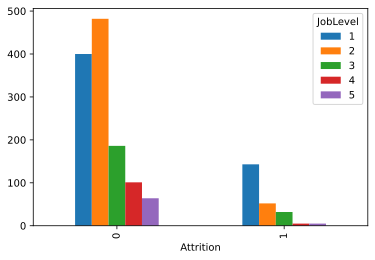

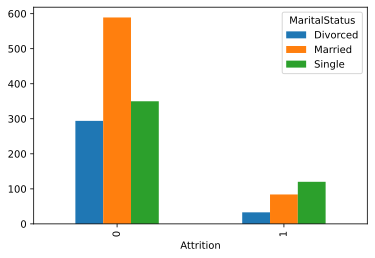

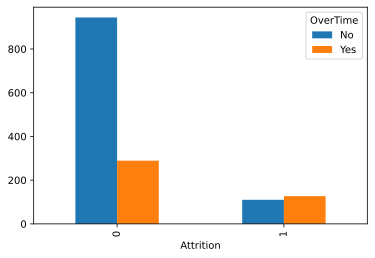

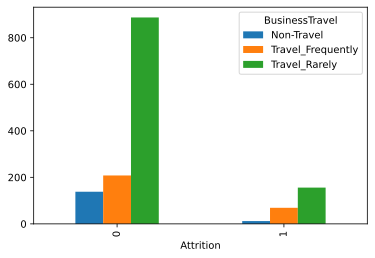

In [ ]:
#Stacked Bar Chart for Crosstab comparison
for i in df_cat_corr:
  pd.crosstab(df_cat['Attrition'],df_cat_corr[i]).plot.bar()

**B. Numerical Variables**

##### From Correlation Matrix

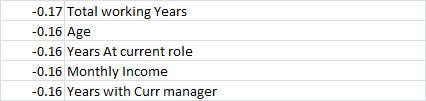

In [ ]:
df_corr=df[['Age','MonthlyIncome','TotalWorkingYears',
       'YearsInCurrentRole', 'YearsWithCurrManager', ]]

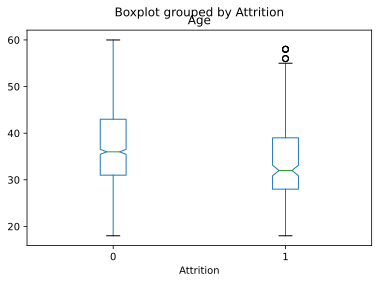

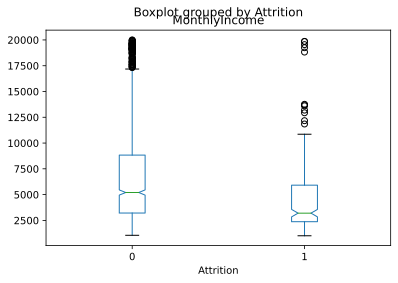

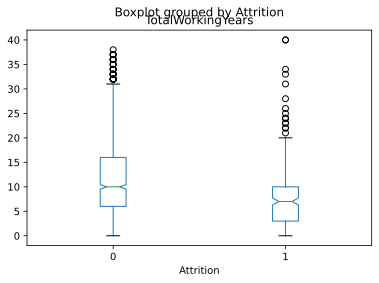

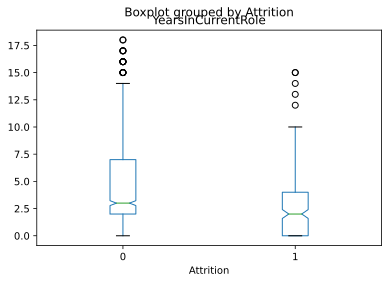

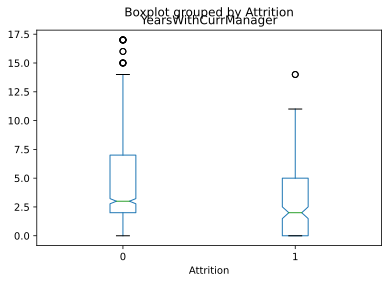

In [ ]:
#Side by Side Box plot for Bivariate Num
for i in df_corr:
  df_num.boxplot( column= i,
              notch = True,
              by = "Attrition",
              grid = False,
              figsize= (6,4),
               )
  
  plt.show()


Shivani BoxPlot Analysis